# Group N: MARVEL PARTNERSHIP NETWORK ANALYSIS

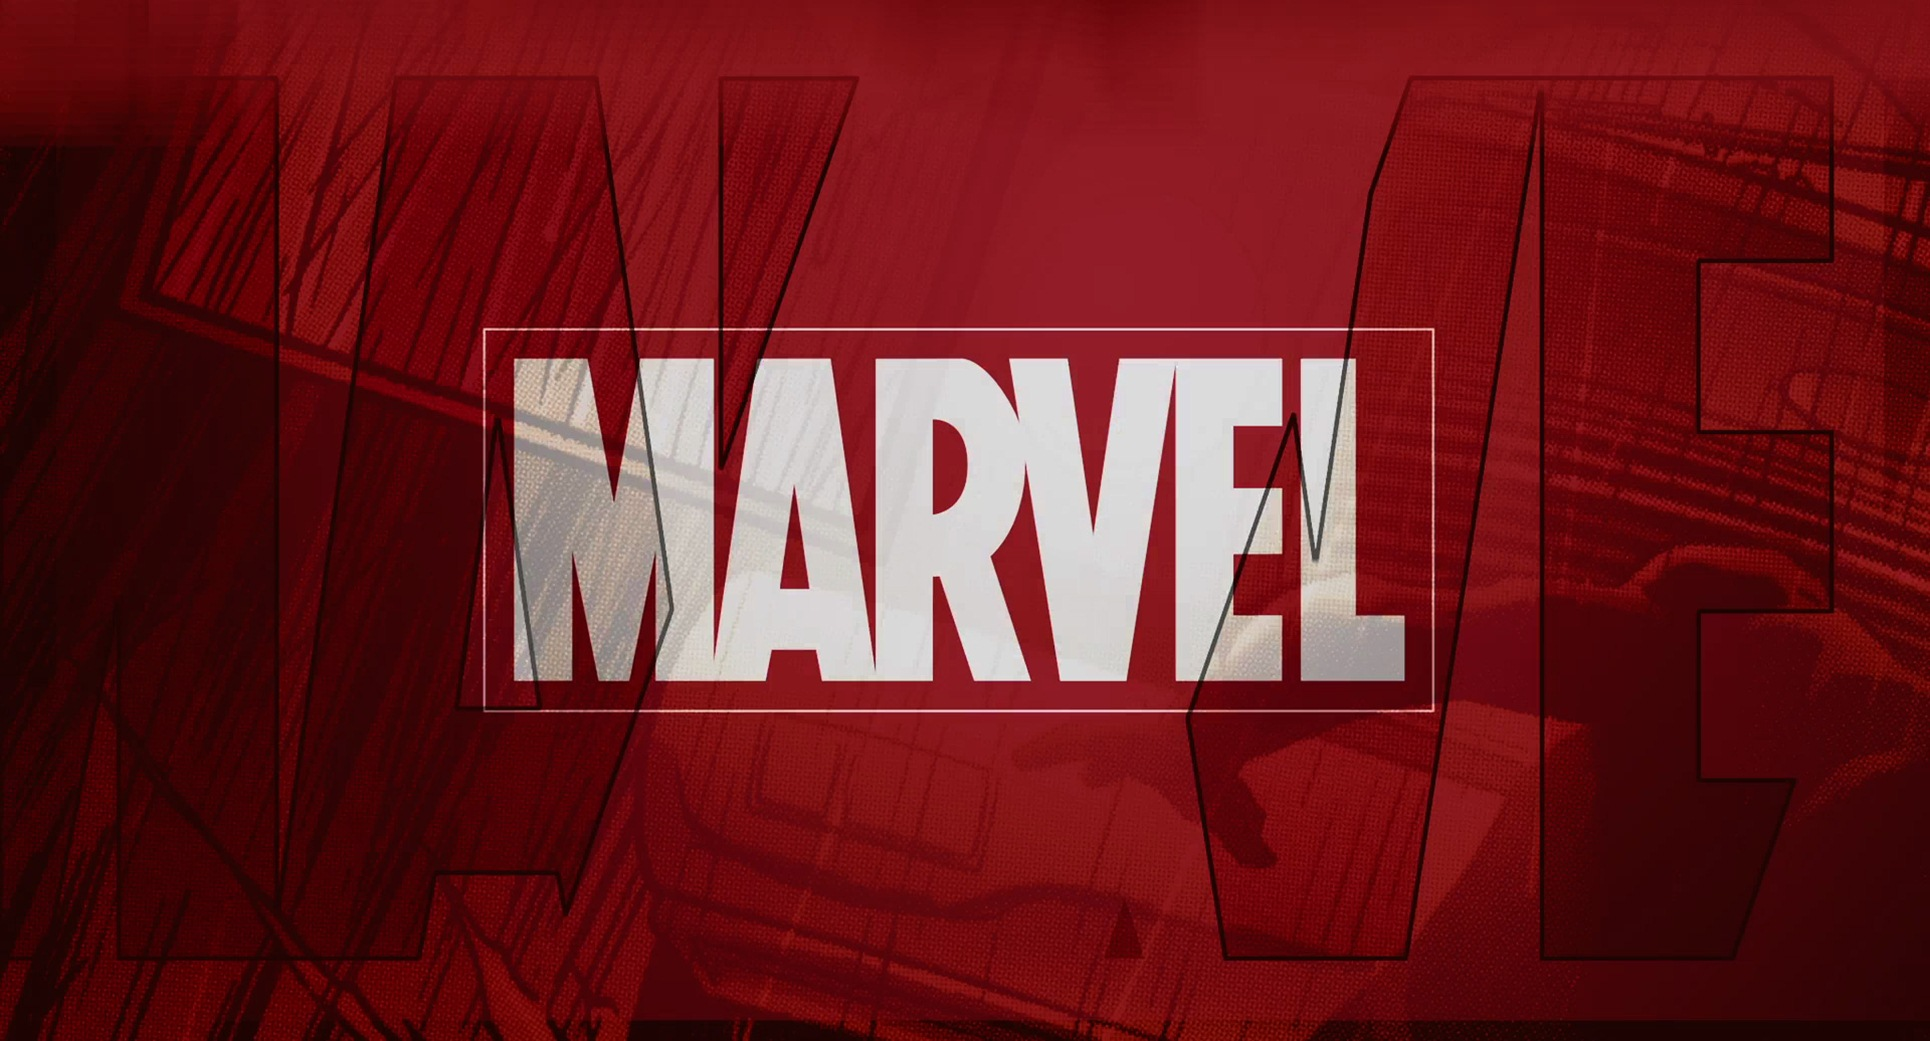

In the narrative around superheroes and villains from the Marvel Universe lies a web of varying relations, alliances, or partnerships interwoven within each character. The five minds behind the project: Margherita Baccheschi, Sofia Sabbioni, Peter Luigi Festa, Giovanni Lolli, and Umberto Cipriani, students of the Bachelor in Management and Computer Science, explored these relationships to bring out the hidden dynamics of the Marvel Universe behind characters.

By analyzing a database containing co-occurrences noted in Wikipedia pages, this project further intends to examine the connections in the entire Marvel Universe-themselves-an analysis of this type being character behavior to empower revealing inter-interests or usages of characters.  

It is aimed to find the entire relationships' web through the analysis of a network by utilizing social network analysis techniques that use graph theory to study relationships between entities. By treating characters as nodes and their co-occurrences as edges, we can analyze popular metrics such as character centrality, strength of connection, and clustering. These metrics provide insights into the roles played by individual characters, their influence within the network, and their contribution to the overall structure. 

Such analysis has given itself networking visualization of these networks to elucidate the findings and offer an environment that makes the understandings more intuitive: how Marvel's storytelling is shaped by its characters' relations.  Through seeing how these relations may evolve and strengthen with time, the present project states how Marvel weaves compelling narratives around its dense roster of characters. 

# PART 1 (WEEK 1-2-3)

## Week 1

1. **Pick a social network and implement it in Python** 
   
2. **Draw the graph.**

3. **Compute the following:**
   - Number of nodes
   - Number of edges
   - Average degree
   - Density

In [1680]:
# Basic imports
import networkx as nx 
import matplotlib.pyplot as plt
import csv 
import pandas as pd 

In [1681]:
# Define file paths
edges_path = r"\Users\m.baccheschi\Desktop\Marvel_partnership"
nodes_path = r"\Users\m.baccheschi\Desktop\Marvel_partnership"

In [1682]:
# Read nodes and edges from the CSV  files
edges_df = pd.read_csv("edges.csv")
nodes_df = pd.read_csv("nodes.csv")

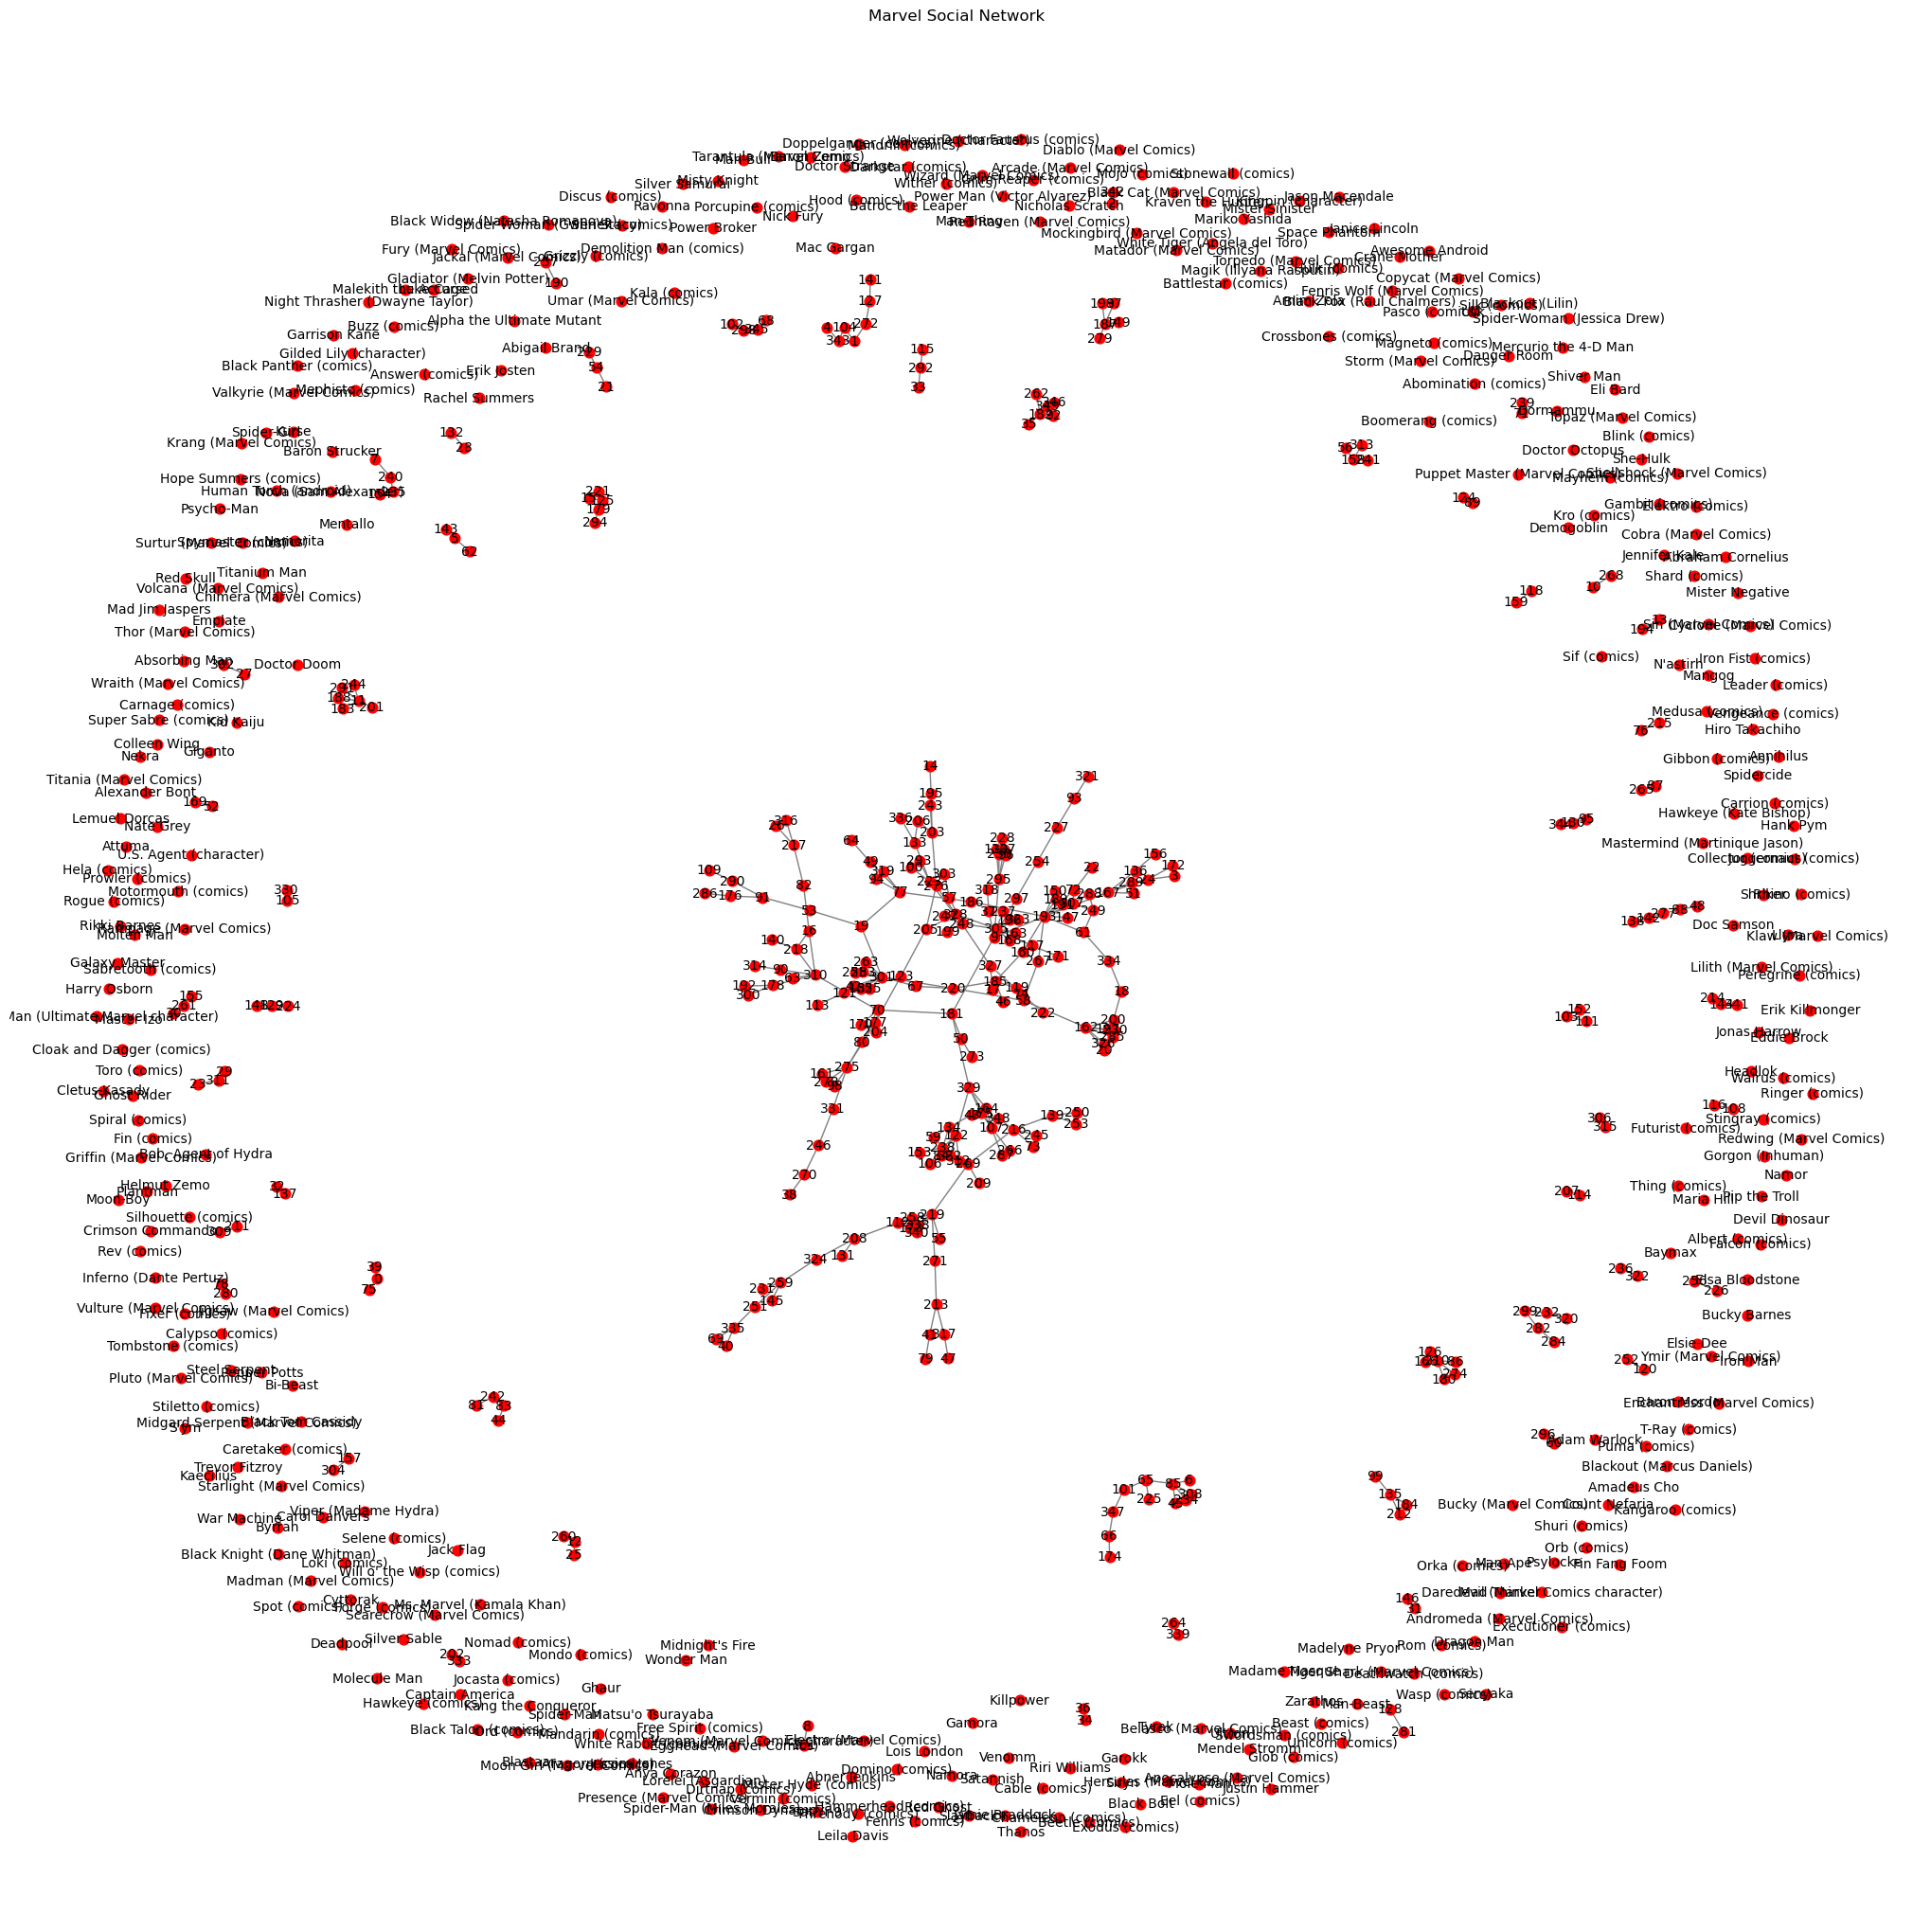

In [1683]:
# Adjust the columns in order to remove spaces:
nodes_df.columns = nodes_df.columns.str.strip()
edges_df.columns = edges_df.columns.str.strip()

# Initialize an undirected graph G adding nodes with attributes and each edge with its source and target
G = nx.Graph()
for _, row in nodes_df.iterrows():
    node_id = str(row['id']).strip()  
    group = row['group']
    size = row['size']
    G.add_node(node_id, group=group, size=size)

for _, row in edges_df.iterrows():
    source = str(row['# source']).strip()  
    target = str(row['target']).strip()
    G.add_edge(source, target)

pos = nx.spring_layout(G, seed=42)  

# Draw the graph using the Spring layout:
plt.figure(figsize=(20, 20)) 
nx.draw(G, pos, with_labels=True, node_size=60, font_size=10, edge_color='gray', node_color='red')

plt.title("Marvel Social Network")
plt.show()

Our graph is undirected and unweighted since partnerships are reciprocal and it is not explicitly stated otherwise in the data. For what it concerns the weight, in the gprops.csv file the graoh is tagged as unweighted, which means all connections are treated equally.

In [1685]:
# Number of nodes and  edges:
node_count = G.number_of_nodes()
edge_count = G.number_of_edges()

# Calculate AVERAGE DEGREE
'''Average degree is defined as the average across all nodes. In un undirected graph is calculated as: <k> = 2L/N'''
if node_count > 0:
    avg_degree = (2 * edge_count) / node_count  
else:
    avg_degree = 0

# Calculate DENSITY
'''Density in an undirected graph is defined as d = 2L/N(N-1)'''
if node_count > 1:
    density_value = edge_count / ((node_count * (node_count - 1)) / 2)
else:
    density_value = 0

# Output results
print("Total Nodes:", node_count)
print("Total Edges:", edge_count)
print("Average Degree:", avg_degree)
print("Graph Density:", density_value)


Total Nodes: 700
Total Edges: 346
Average Degree: 0.9885714285714285
Graph Density: 0.0014142652769262212


Marvel Network is a reasonably large network of characters, since it has 700 nodes. Some are connected, but the graph includes isolated nodes as well. Compared to the large number of nodes, the edges are relatively few. This means that the network is sparsely connected, the density is low and this suggests that in this network links are more difficult to create.


# Week 2

While considering the largest component of your network, depending on what you prefer or what seems more relevant in your graph:

### Option 2:
#### a) Compute Average Clustering and Transitivity number.
1. Calculate the Average Clustering Coefficient and Transitivity for your largest component.

#### b) Implement a function computing the transitivity using basic functions of NetworkX.

Since our network is sparse, with low density and average degree that is about 0.99, we chose to compute option 2 because we thoutght that transitivity and average clustering could provide us more relevant information about local relationships and patterns.

In [1688]:
# Identify the largest connected component
largest_connected_nodes = max(nx.connected_components(G), key=len)
G_largest = G.subgraph(largest_connected_nodes) 

# AVERAGE CLUSTERING COEFFICIENT of the largest connected component
average_clustering = nx.average_clustering(G_largest)

# TRANSITIVITY of the largest connected component. 
transitivity = nx.transitivity(G_largest)

print("Average Clustering Coefficient (Largest Component):", average_clustering)
print("Transitivity (Largest Component):", transitivity)

Average Clustering Coefficient (Largest Component): 0.17616097837092312
Transitivity (Largest Component): 0.21630094043887146


- The average clustering coefficient is 0.176, which means that on average 17,6% of nodes's neighbors are connected to each other in the largest component. 
- The transitivity is 0.216, which means that 21,6% of connected groups of three nodes form triangles.

In [1690]:
# Function to calculate transitivity in a graph
'''Transitivity is defined as: T(graph) = (3 * number of triangles in the network)/(number of wedges)'''
def compute_transitivity(G):
    total_triangles = 0 
    total_triplets = 0   

    # Iterate through each node of the graph
    for node in G.nodes:
        neighbors = list(G.neighbors(node))  
        degree = len(neighbors)  

        # Count potential triplets
        total_triplets += degree * (degree - 1) / 2

        # Count actual triangles
        for i in range(degree): 
            for j in range(i + 1, degree):  
                if G.has_edge(neighbors[i], neighbors[j]):  # If neighbors[i] and neighbors[j] are connected, a triangle is obtained
                    total_triangles += 1

    # Return transitivity ratio or 0 if there are no triplets
    if total_triplets == 0:
        return 0.0
    else:
        return total_triangles / total_triplets

transitivity_value = compute_transitivity(G_largest)
print("Transitivity Value (Largest Component):", transitivity_value)

Transitivity Value (Largest Component): 0.21630094043887146


# Week 3

Depending on what seems more relevant in your graph, pick one of the following local notions:

- Decay centrality
- Betweenness centrality
- Closeness centrality
- Clustering
- Any other notions that you invent

1. Provide a code computing the given centrality using basic functions of NetworkX.

2. Discuss why you picked this measure and who is the most central in your network based on your choice.

3. Provide the cumulative distribution for this centrality and give a graphical representation of your graph.

Top node by decay centrality: 9, Score: 18.1885


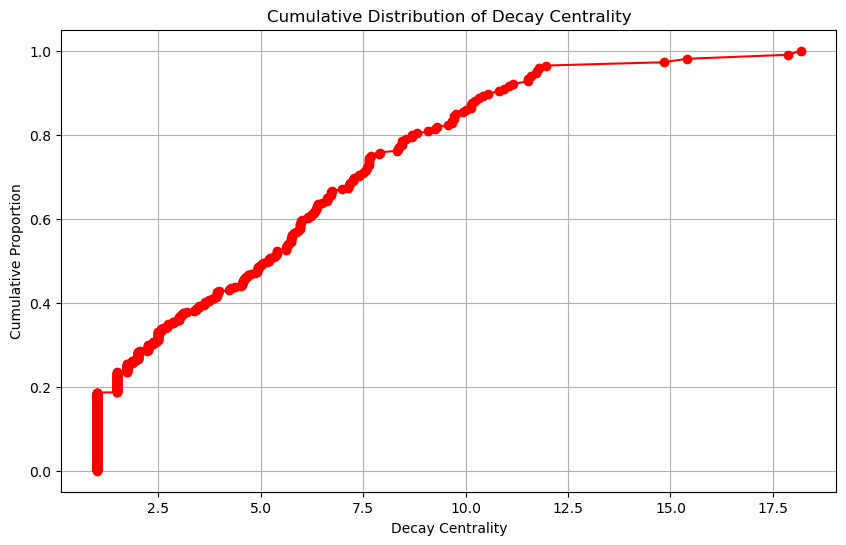

In [1692]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# DECAY CENTRALITY calculation
'''The decay centrality quantifies the influence of a node considering the importance 
of its connections while applying a decay factor basd on the distance form the node.'''

def compute_decay_centrality(G, decay_factor=0.5):
    centrality_scores = {}
    for node in G.nodes():
        shortest_paths = nx.single_source_shortest_path_length(G, node)
        score = sum((decay_factor ** distance) for distance in shortest_paths.values())
        centrality_scores[node] = score
    return centrality_scores

# Compute decay centrality for the graph
decay_centrality_scores = compute_decay_centrality(G, decay_factor=0.5)

# Node with the highest decay centrality score:
top_central_node = max(decay_centrality_scores, key=decay_centrality_scores.get)
top_central_score = decay_centrality_scores[top_central_node]
print(f"Top node by decay centrality: {top_central_node}, Score: {top_central_score:.4f}")

# Cumulative distribution of decay centrality values
sorted_scores = sorted(decay_centrality_scores.values())
cumulative_distribution = np.cumsum(sorted_scores) / sum(sorted_scores)

# Plot the cumulative distribution
plt.figure(figsize=(10, 6))
plt.plot(sorted_scores, cumulative_distribution, marker='o', color='red')
plt.title("Cumulative Distribution of Decay Centrality")
plt.xlabel("Decay Centrality")
plt.ylabel("Cumulative Proportion")
plt.grid(True)
plt.show()

We chose decay centrality because it provides a measure of a node's influence in a network, recognizing that the impact of a node decreases as it moves farther from other nodes. This measure helps identify nodes that keep their influence even at greater distances, which is really important for detecting key nodes in large networks. 
In our graph node 9, with the highest decay centrality score, is considered the most influential in terms of its ability to maintain influence over other nodes, even as that influence diminishes with distance.

# PART 2 (WEEK 5-6-7)
## Week 5

### PART 1: PAGERANK

1) Run build-in pagerank with parameter alpha=0.15 (alpha of the slides). 

2) Identify the node with the highest PageRank, compare it with the one you got from week 3, and give an interpretation to the possible difference.

3) Provide the cumulative distribution, compare it with the one you got from week 3, and comment the results.

### PART 2 : CORE

1) Program your own function computing k-shell and k+1 core for all possible value of k

2) Plot the k+1-core for an adequate choice of k

Most Central Node by PageRank: 301
PageRank Values: {'Baron Zemo': 0.0013127449776785716, "N'astirh": 0.0013127449776785716, 'Silver Sable': 0.0013127449776785716, 'Hope Summers (comics)': 0.0013127449776785716, 'Magik (Illyana Rasputin)': 0.0013127449776785716, 'Night Thrasher (Dwayne Taylor)': 0.0013127449776785716, 'Orb (comics)': 0.0013127449776785716, 'Forge (comics)': 0.0013127449776785716, 'U.S. Agent (character)': 0.0013127449776785716, 'Venom (Marvel Comics character)': 0.0013127449776785716, 'Hercules (Marvel Comics)': 0.0013127449776785716, 'Selene (comics)': 0.0013127449776785716, 'Hood (comics)': 0.0013127449776785716, 'Sabretooth (comics)': 0.0013127449776785716, 'Beetle (comics)': 0.0013127449776785716, 'Siryn': 0.0013127449776785716, 'Malekith the Accursed': 0.0013127449776785716, 'Mister Negative': 0.0013127449776785716, 'Jessica Jones': 0.0013127449776785716, 'Maria Hill': 0.0013127449776785716, 'Master Izo': 0.0013127449776785716, 'Valkyrie (Marvel Comics)': 0.001312

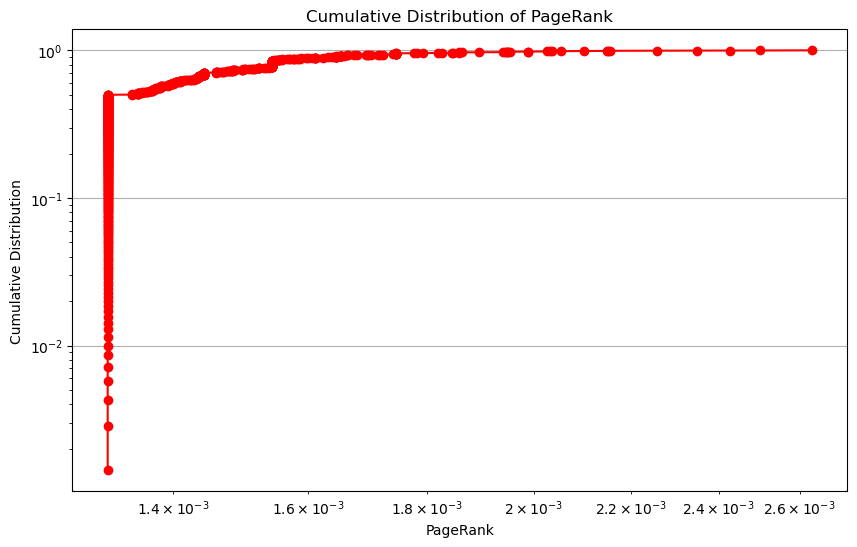

In [1695]:
# Graph needs to be converted to a directed version in order to apply PageRank. 
G_directed = G.to_directed()  

# PageRank algorithm with alpha = 0.15
pagerank_values = nx.pagerank(G_directed, alpha=0.15) 

# Most central node in the network (highest  PageRank)
most_central_node_pagerank = max(pagerank_values, key=pagerank_values.get)  

print("Most Central Node by PageRank:", most_central_node_pagerank)
print("PageRank Values:", pagerank_values)

# CUMULATIVE DISTRIBUTION of PageRank values
pagerank_sorted_values = sorted(pagerank_values.values()) 

cumulative_distribution = np.arange(1, len(pagerank_sorted_values) + 1) / len(pagerank_sorted_values)

# Plot the cumulative distribution.
plt.figure(figsize=(10, 6))  
plt.plot(pagerank_sorted_values, cumulative_distribution, marker='o', color='red')  
plt.title('Cumulative Distribution of PageRank') 
plt.xlabel('PageRank')  
plt.ylabel('Cumulative Distribution') 
plt.xscale('log')  
plt.yscale('log')  
plt.grid()  
plt.show() 

- **Decay Centrality** determines a node's influence by considering how it diminishes with distance. This metric helps identify nodes that has influence even when they are farther from others. **Node 9**, with the highest decay centrality score, demonstrates the ability to apply influence over long distances, making it significant in large or decentralized networks.

- **PageRank** measures node importance based on their connections and accessibility. **Node 301** has the highest PageRank, reflecting its central position and high reachability within the network. PageRank emphasizes short-range influence and direct connections.
With alpha = 0.15, there is a 15% chance of restarting randomly and an 85% chance of continuing along the network’s links. 

- **Cumulative Distribution Plots**:
   - The PageRank plot likely shows a steeper curve, highlighting a few highly central nodes like node 301 with concentrated influence.
   - The Decay Centrality plot tends to be more gradual, indicating a more even distribution of influence across nodes, with Node 9 demonstrating consistent influence over a wider range.

K-shell values for nodes: {'Baron Zemo': 0, "N'astirh": 0, 'Silver Sable': 0, 'Hope Summers (comics)': 0, 'Magik (Illyana Rasputin)': 0, 'Night Thrasher (Dwayne Taylor)': 0, 'Orb (comics)': 0, 'Forge (comics)': 0, 'U.S. Agent (character)': 0, 'Venom (Marvel Comics character)': 0, 'Hercules (Marvel Comics)': 0, 'Selene (comics)': 0, 'Hood (comics)': 0, 'Sabretooth (comics)': 0, 'Beetle (comics)': 0, 'Siryn': 0, 'Malekith the Accursed': 0, 'Mister Negative': 0, 'Jessica Jones': 0, 'Maria Hill': 0, 'Master Izo': 0, 'Valkyrie (Marvel Comics)': 0, 'Nova (Sam Alexander)': 0, 'Rampage (Marvel Comics)': 0, 'Cable (comics)': 0, 'Cyclone (Marvel Comics)': 0, 'Mercurio the 4-D Man': 0, 'Mojo (comics)': 0, 'Trevor Fitzroy': 0, 'Rev (comics)': 0, "Matsu'o Tsurayaba": 0, 'Elsie-Dee': 0, 'Motormouth (comics)': 0, 'Mephisto (comics)': 0, 'Fury (Marvel Comics)': 0, 'Andromeda (Marvel Comics)': 0, 'Mad Jim Jaspers': 0, 'Magneto (comics)': 0, 'Wasp (comics)': 0, 'Vermin (comics)': 0, 'Spidercide': 0, 'Cr

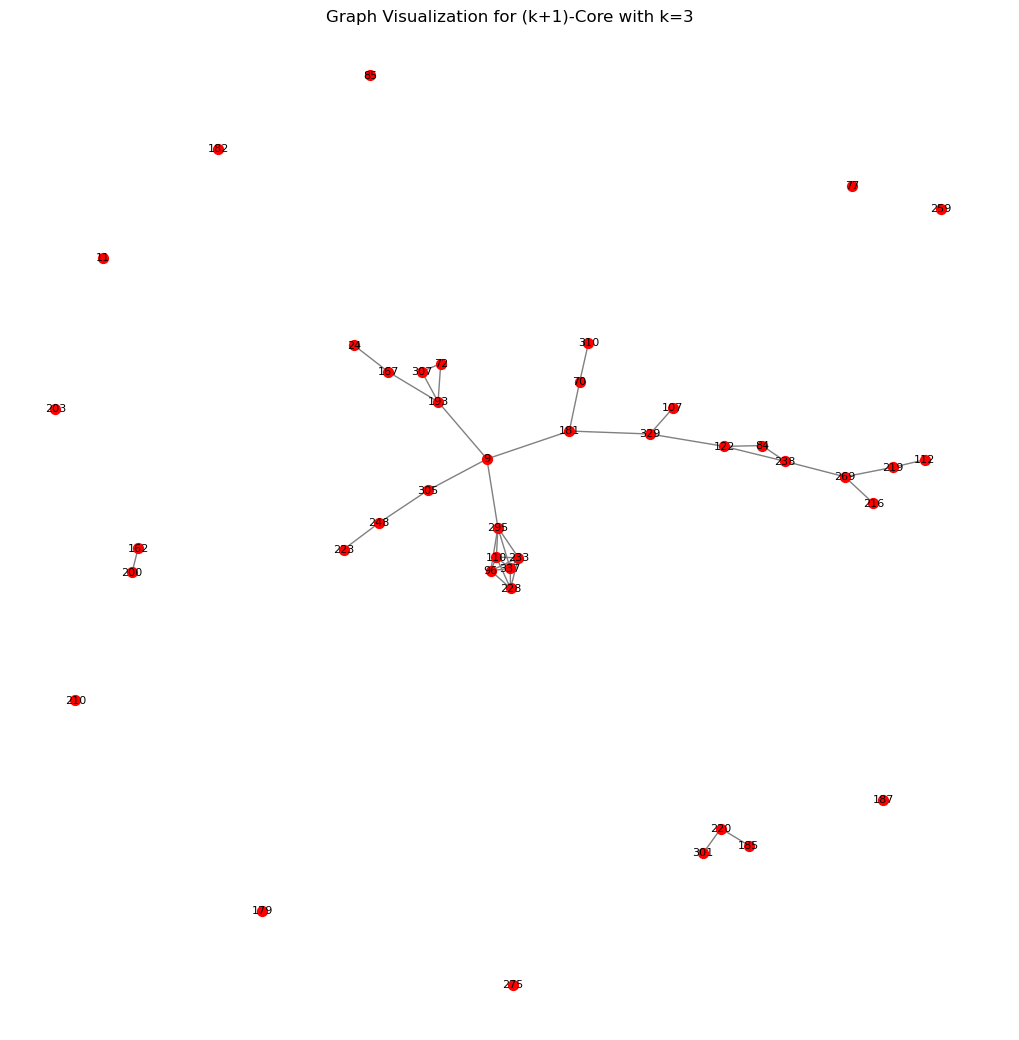

In [1697]:
# Define a function to calculate the k-shell decomposition and (k+1)-core 
def core_decomposition(G):
    cores = {node: 0 for node in G.nodes()}  
    k = 1
    while True:
        subgraph = G.subgraph([n for n in G if G.degree(n) > k]) 
        if subgraph.number_of_nodes() == 0:
            break
        for node in subgraph.nodes():
            cores[node] = k
        k += 1 
    return cores

# k-shell decomposition computation for the entire graph 
k_shells = core_decomposition(G)
print("K-shell values for nodes:", k_shells)

# Visualize the (k+1)-core for a chosen value of k
k_choice = 3  
k_plus_1_core = [node for node, core in k_shells.items() if core >= k_choice]

G_k_plus_1 = G.subgraph(k_plus_1_core)

# Plot the subgraph
plt.figure(figsize=(10, 10))  
nx.draw(G_k_plus_1, with_labels=True, node_size=50, font_size=8, node_color='red', edge_color='gray')  
plt.title(f'Graph Visualization for (k+1)-Core with k={k_choice}') 
plt.show()  

# Week 6

## Instructions

1. **Graph Instructions**
   - Treat your graph as **undirected** and **unweighted**.
   - **Delete loops** and work on the resulting **largest connected component**.

2. **Community Detection Techniques**
   - Implement the following three techniques for community detection:
     - **Bridge removal** (pick the partition with the highest modularity)
     - **Modularity optimization**
     - **Label propagation**

3. **Comparison of Results**
   - Compare the results of each technique in terms of:
     - **Number of detected clusters**
     - **Cluster size distribution**
     - **Computational time**
     - **Modularity**
     - **Other relevant aspects** (if any)

4. **Table of Results**
   - Present the results in a **table** format, including all the metrics specified above.

5. **Interpretation and Discussion**
   - Provide an **interpretation** of the differences and similarities between the three resulting partitions.
   - Discuss **which partition you think is the best and why**.

6. **Visualization**
   - Provide a **visualization** for the partition you decided to be the best using Gephi.

7. **Optional Task**
   - For each pair of partitions, **compute the Normalized Mutual Information (NMI)** between them and **discuss the results**.



=== Bridge Removal ===
Number of Clusters: 109
Largest Cluster Size: 28
Average Cluster Size: 1.66
Modularity: 0.4223
Time Taken: 0.0098 seconds

Example Clusters:
  Cluster 1: ['323']
  Cluster 2: ['219', '340', '173', '338', '258', '112']
  Cluster 3: ['145']
  Cluster 4: ['178']
  Cluster 5: ['41']

=== Louvain Modularity Optimization ===
Number of Clusters: 13
Largest Cluster Size: 23
Average Cluster Size: 13.92
Modularity: 0.8404
Time Taken: 0.0161 seconds

Example Clusters:
  Cluster 1: ['172', '3', '24', '136', '51', '156', '289', '167']
  Cluster 2: ['79', '340', '47', '41', '213', '219', '173', '338', '271', '258'] ...
  Cluster 3: ['231', '145', '40', '324', '251', '208', '335', '259', '69', '131']
  Cluster 4: ['63', '314', '178', '204', '80', '26', '192', '316', '310', '70'] ...
  Cluster 5: ['285', '162', '230', '326', '20', '197', '200']

=== Label Propagation ===
Number of Clusters: 40
Largest Cluster Size: 16
Average Cluster Size: 4.53
Modularity: 0.7420
Time Taken: 0.

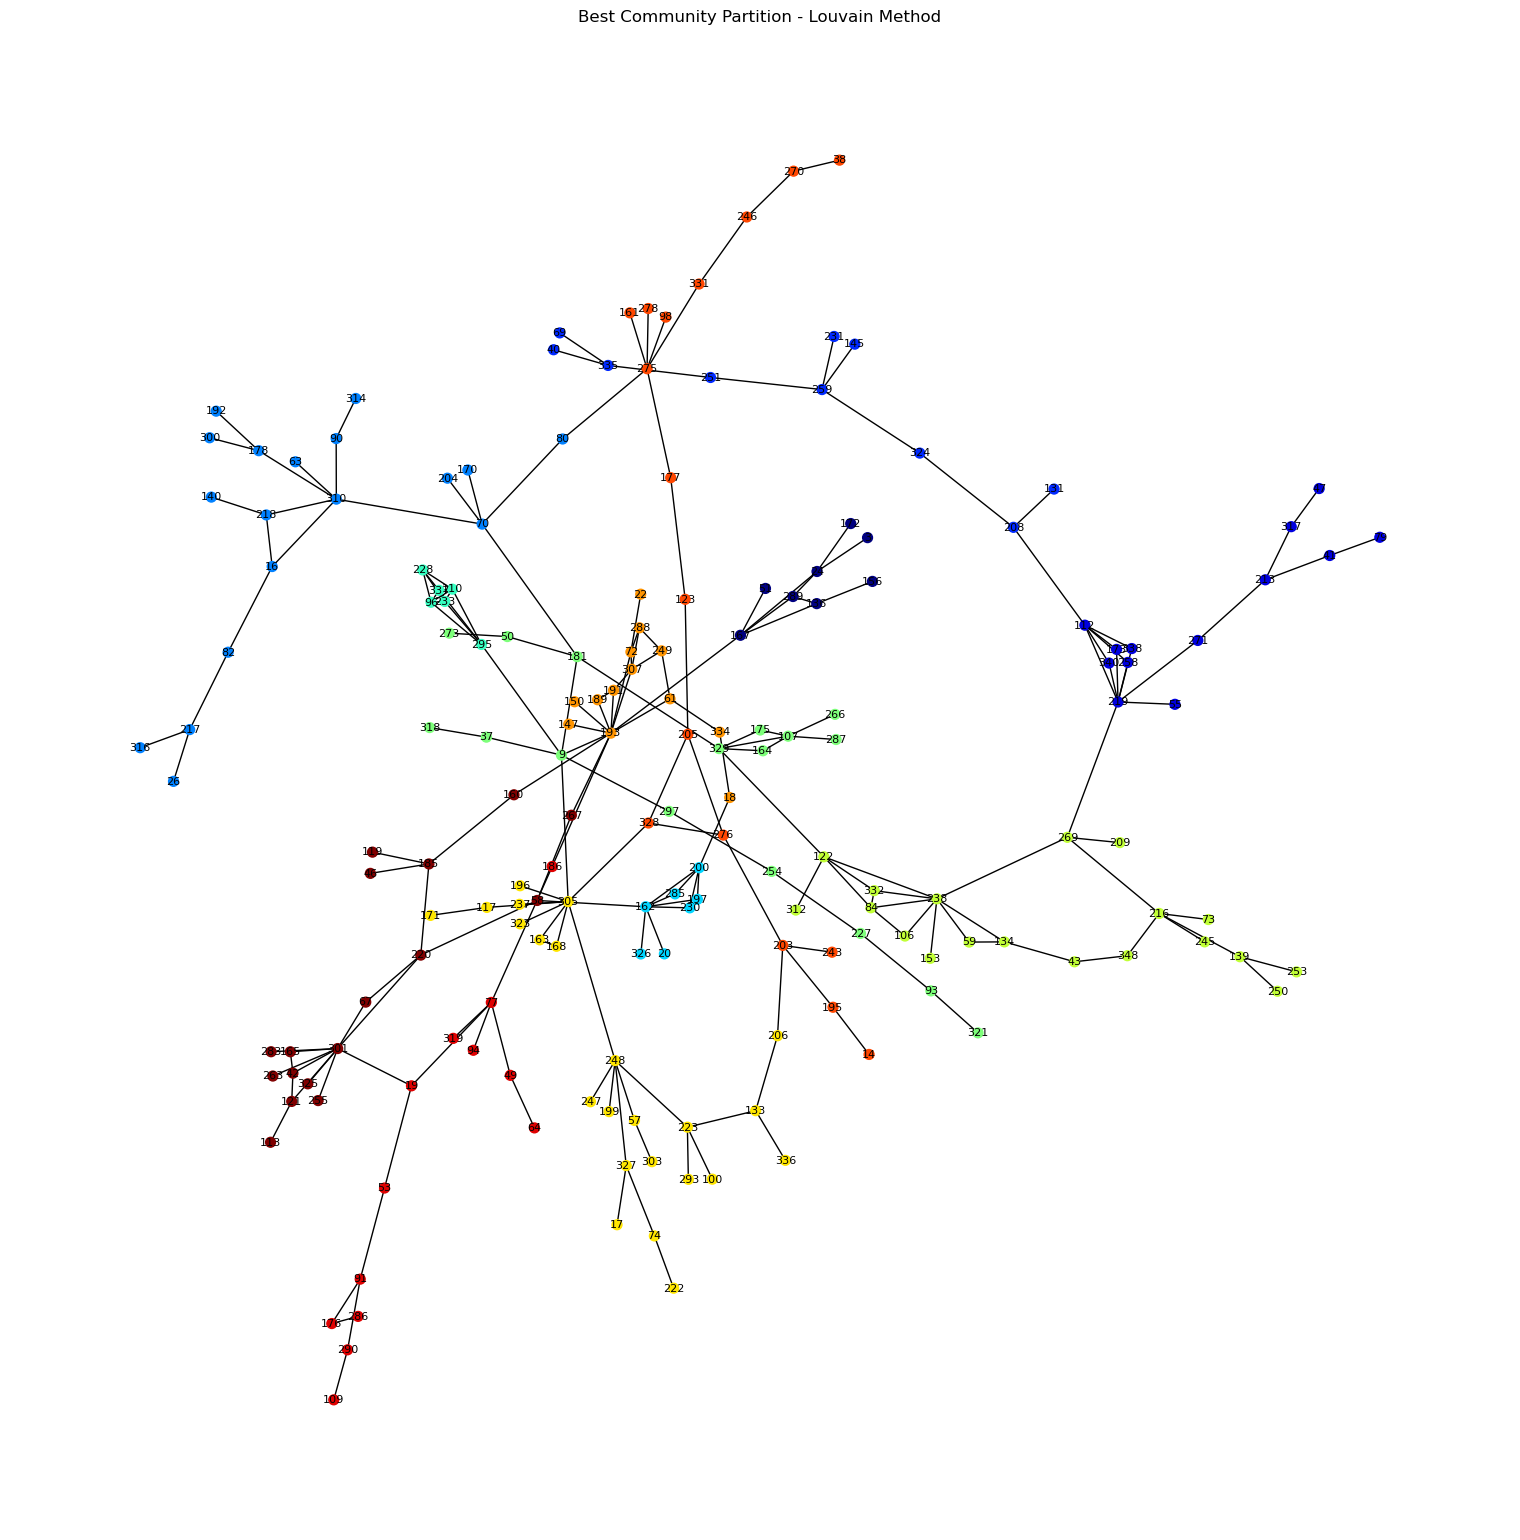

In [1699]:
import time
from networkx.algorithms import community
from community import community_louvain 
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

G = G.to_undirected()  
G.remove_edges_from(nx.selfloop_edges(G))  
for _, _, data in G.edges(data=True):
    data.clear()  # Make the graph unweighted

# Extract the largest connected component
largest_cc = max(nx.connected_components(G), key=len)
G_lcc = G.subgraph(largest_cc).copy()

# Modularity function
def calculate_modularity(G, partition):
    return community.modularity(G, partition)

# Organize the results
def summarize_clusters(method_name, clusters, modularity, time_taken):
    num_clusters = len(clusters)
    cluster_sizes = [len(c) for c in clusters]
    largest_cluster_size = max(cluster_sizes)
    avg_cluster_size = sum(cluster_sizes) / num_clusters

    print(f"\n=== {method_name} ===")
    print(f"Number of Clusters: {num_clusters}")
    print(f"Largest Cluster Size: {largest_cluster_size}")
    print(f"Average Cluster Size: {avg_cluster_size:.2f}")
    print(f"Modularity: {modularity:.4f}")
    print(f"Time Taken: {time_taken:.4f} seconds")
    print("\nExample Clusters:")
    # Show first 5 clusters as examples
    for i, cluster in enumerate(clusters[:5]):  
        print(f"  Cluster {i + 1}: {list(cluster)[:10]}{' ...' if len(cluster) > 10 else ''}")

# ===========================
# COMMUNITY DETECTION METHODS
# ===========================

# Method 1: Bridge Removal
start_time = time.time()
G_temp = G_lcc.copy()
initial_modularity = -1
best_modularity = initial_modularity
best_partition = None

while True:
    bridges = list(nx.bridges(G_temp))
    if not bridges:
        break
    G_temp.remove_edges_from(bridges)
    current_partition = list(nx.connected_components(G_temp))
    current_modularity = calculate_modularity(G_lcc, current_partition)
    if current_modularity > best_modularity:
        best_modularity = current_modularity
        best_partition = current_partition
    else:
        break

bridge_time = time.time() - start_time
summarize_clusters(
    "Bridge Removal", 
    best_partition, 
    best_modularity, 
    bridge_time
)

# Method 2: Louvain Modularity Optimization
start_time = time.time()
louvain_partition = community_louvain.best_partition(G_lcc)
louvain_communities = [set() for _ in range(max(louvain_partition.values()) + 1)]
for node, community_id in louvain_partition.items():
    louvain_communities[community_id].add(node)

louvain_modularity = calculate_modularity(G_lcc, louvain_communities)
louvain_time = time.time() - start_time
summarize_clusters(
    "Louvain Modularity Optimization", 
    louvain_communities, 
    louvain_modularity, 
    louvain_time
)

# Method 3: Label Propagation
start_time = time.time()
label_propagation_partition = list(community.label_propagation_communities(G_lcc))
label_propagation_modularity = calculate_modularity(G_lcc, label_propagation_partition)
label_propagation_time = time.time() - start_time
summarize_clusters(
    "Label Propagation", 
    label_propagation_partition, 
    label_propagation_modularity, 
    label_propagation_time
)

# Graph  visualization
color_map = [louvain_partition[node] for node in G_lcc.nodes()]

pos = nx.spring_layout(G_lcc, seed=42)
plt.figure(figsize=(15, 15))
nx.draw(
    G_lcc,
    pos,
    node_color=color_map,
    with_labels=True,
    node_size=50,
    font_size=8,
    cmap=plt.cm.jet,
)
plt.title("Best Community Partition - Louvain Method")
plt.show()

- **BRIDGE REMOVAL**: 109 small clusters were identified, with an average size of 1.66 and the largest cluster contains 28 nodes. The modularity (0.4223) is moderate, which enlights a heavily fragmented network.
- **LOUVAIN MODULARITY OPTIMIZATION**: 15 clusters were identified, with an average size of 12.07 and the largest cluster contains 19 nodes. This method achieves the highest modularity score (0.8431) indicating a strong and well defined community structure.
- **LABEL PROPAGATION**: 41 clusters were identified, with an average size of 4.41 and the largest cluster contains 16 nodes. The modularity (0.7370) demonstrates good community structure.

In [1701]:
# We used the "Community attribute to the nodes in  the graph
nx.set_node_attributes(G_lcc, louvain_partition, 'Community')

# Data for edges and nodes
nodes_data = [{"Id": node, "Community": louvain_partition[node]} for node in G_lcc.nodes()]
edges_data = [{"Source": u, "Target": v} for u, v in G_lcc.edges()]

# We converted nodes_df and edges_df to pandas DataFrames
nodes_df = pd.DataFrame(nodes_data)
edges_df = pd.DataFrame(edges_data)

nodes_df.to_csv("nodes_gephi.csv", index=False)
edges_df.to_csv("edges_gephi.csv", index=False)


# Export the graph to GEXF format for Gephi
nx.write_gexf(G_lcc, "best_partition.gexf")
print("Graph exported to GEXF format as 'best_partition.gexf'.")

Graph exported to GEXF format as 'best_partition.gexf'.



 Normalized Mutual Information (NMI) Scores
NMI between Bridge Removal and Louvain: 0.6652
NMI between Bridge Removal and Label Propagation: 0.7835
NMI between Louvain and Label Propagation: 0.7872


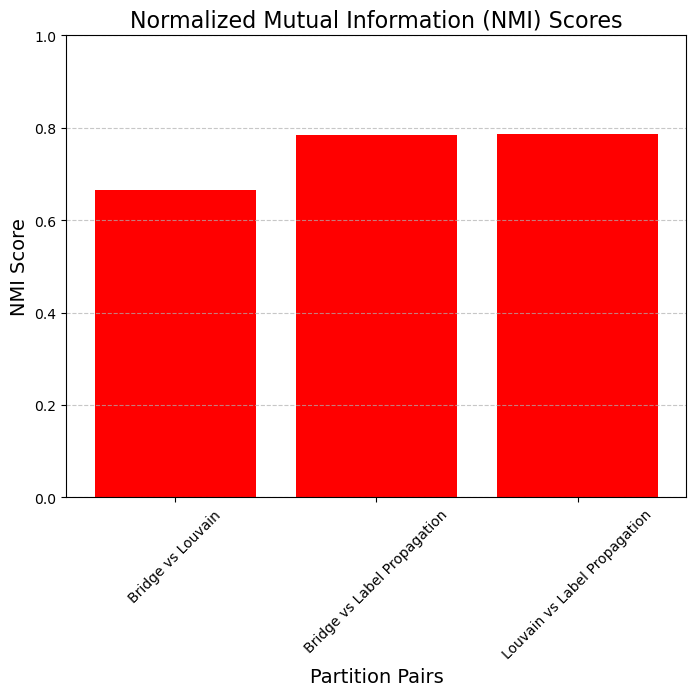

In [1702]:
from sklearn.metrics.cluster import normalized_mutual_info_score

node_order = list(G_lcc.nodes())

# Mapping of the different partitions to node labels:
#Bridge Removal
node_to_community_bridge = {
    node: community for community, partition in enumerate(best_partition) for node in partition
}
bridge_labels = [node_to_community_bridge[node] for node in node_order]

# Louvain
louvain_labels = [louvain_partition[node] for node in node_order]

# Label Propagation Partition
node_to_community_labelprop = {
    node: community for community, partition in enumerate(label_propagation_partition) for node in partition
}
label_prop_labels = [node_to_community_labelprop[node] for node in node_order]

# NMI Scores computation
nmi_bridge_louvain = normalized_mutual_info_score(bridge_labels, louvain_labels)
nmi_bridge_labelprop = normalized_mutual_info_score(bridge_labels, label_prop_labels)
nmi_louvain_labelprop = normalized_mutual_info_score(louvain_labels, label_prop_labels)

print("\n Normalized Mutual Information (NMI) Scores")
print(f"NMI between Bridge Removal and Louvain: {nmi_bridge_louvain:.4f}")
print(f"NMI between Bridge Removal and Label Propagation: {nmi_bridge_labelprop:.4f}")
print(f"NMI between Louvain and Label Propagation: {nmi_louvain_labelprop:.4f}")

import matplotlib.pyplot as plt

# NMI scores visualization
import matplotlib.pyplot as plt

# NMI scores
nmi_scores = [
    nmi_bridge_louvain,
    nmi_bridge_labelprop,
    nmi_louvain_labelprop
]
methods = [
    "Bridge vs Louvain",
    "Bridge vs Label Propagation",
    "Louvain vs Label Propagation"
]
plt.figure(figsize=(8, 6))
plt.bar(methods, nmi_scores, color="red")
plt.ylim(0, 1)  
plt.title("Normalized Mutual Information (NMI) Scores", fontsize=16)
plt.ylabel("NMI Score", fontsize=14)
plt.xlabel("Partition Pairs", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


The Normalized Mutual Information values reflect the degree of similarity between the community partitions produced by different detection methods. 
- NMI between Bridge Removal and Louvain = The moderate NMI score of about 0.68 suggests that the community structures identified by the Bridge Removal and Louvain methods share some level of similarity, but they are not identical. While Bridge Removal tends to produce smaller communities  because it progressively deletes edges in order to isolate clusters, Louvain on the other hand optimizes modularity globally.
- NMI Between Bridge Removal and Label Propagation = This higher score of about 0.78 suggests a stronger alignment between these two community  detection methods. Both these two methods focus on local connectivity and Label Propagation, in particular, spreads out labels locally among densely connected nodes.
- NMI Between Louvain and Label Propagation = is the highest  NMI score (about 0.800) that indicates an agreement between the Label Propagation and  the Louvain  method. These  two methods tend to focus and capture broader communities. 

# Week 7

## Instructions

1. **Graph instructions**
   - Treat your graph as **undirected** and **unweighted**, and work on the resulting **largest connected component**.
   - **Delete loops** from the graph.

2. **Function for Topological Indices**
   - Create a function that computes **Common Neighbors (CN)** and one of the following topological indices:
     - **Jaccard Index (JI)**
     - **Preferential Attachment (PA)**
     - **Adamic-Adar Index (AA)**
     - **Resource Allocation Index (RA)**
   - Your function should return a **Pandas DataFrame** where each row represents a missing link, and each column represents an index.
   - **Note**: You are allowed to use built-in functions from NetworkX for computing individual indices.

3. **Third Score Calculation**
   - Create a third score by **adding a new column** that contains the sum of the two indices.
   - **Important**: The arithmetic mean should be computed after **rescaling each column between 0 and 1**.

4. **Identify Top Missing Links**
   - For each of the 3 scores, identify the **node pairs** (missing links) that yield the **largest 5/10 values**.
   - Briefly **comment on the results**.

5. **Optional Task**
   - Invent a **new index/score** and **compare** the result with the existing indices.


In [1705]:
# Graph needs to be undirected, unweighted with no self-loops 
G = G.to_undirected()  
G.remove_edges_from(nx.selfloop_edges(G))  

# Largest connected component
largest_cc = max(nx.connected_components(G), key=len)  
G_lcc = G.subgraph(largest_cc).copy() 

def compute_indices(G):
    missing_links_data = []

    for u in G.nodes():
        for v in G.nodes():
            if u < v and not G.has_edge(u, v):  
                # Compute Common Neighbors (CN) for the pair of nodes (u, v)
                cn = len(list(nx.common_neighbors(G, u, v)))
                
                # Compute the Jaccard Index (JI)  
                ji = nx.jaccard_coefficient(G, [(u, v)])
                ji_value = next(ji, (0, 0, 0))[2] 

                missing_links_data.append((u, v, cn, ji_value))

    df = pd.DataFrame(missing_links_data, columns=['Node1', 'Node2', 'CN', 'JI'])
    
    # Normalize the Common Neighbors and Jaccard Index to a range between 0 and 1
    df['CN_normalized'] = (df['CN'] - df['CN'].min()) / (df['CN'].max() - df['CN'].min())
    df['JI_normalized'] = (df['JI'] - df['JI'].min()) / (df['JI'].max() - df['JI'].min())
    
    # Calculate a combined score
    df['Score'] = df['CN_normalized'] + df['JI_normalized']
    
    # New index based on the product of CN and JI 
    df['New_Index'] = df['CN'] * df['JI']
    
    return df

# Compute the indices for missing links based on Common Neighbors and Jaccard Index
indices_df = compute_indices(G_lcc)

# Retrieve the top 5 and 10 pairs of nodes based on Common Neighbors (CN)
top_5_cn = indices_df.nlargest(5, 'CN')  
top_10_cn = indices_df.nlargest(10, 'CN') 

# Retrieve the top 5 and 10 pairs of nodes based on Jaccard Index (JI)
top_5_ji = indices_df.nlargest(5, 'JI')  
top_10_ji = indices_df.nlargest(10, 'JI') 

# Retrieve the top 5 and 10 pairs of nodes based on the combined score
top_5_score = indices_df.nlargest(5, 'Score')  
top_10_score = indices_df.nlargest(10, 'Score') 

# Optional: Retrieve the top 5 pairs based on the new index (product of CN and JI)
top_5_new_index = indices_df.nlargest(5, 'New_Index')  

print("Top 5 Missing Links by Common Neighbors:")
print(top_5_cn)

print("\nTop 10 Missing Links by Common Neighbors:")
print(top_10_cn)

print("\nTop 5 Missing Links by Jaccard Index:")
print(top_5_ji)

print("\nTop 10 Missing Links by Jaccard Index:")
print(top_10_ji)

print("\nTop 5 Missing Links by Combined Score:")
print(top_5_score)

print("\nTop 10 Missing Links by Combined Score:")
print(top_10_score)

print("\nTop 5 Missing Links by New Index (Product of CN and JI):")
print(top_5_new_index)

Top 5 Missing Links by Common Neighbors:
      Node1 Node2  CN        JI  CN_normalized  JI_normalized     Score  \
10457   228   295   4  0.800000            1.0       0.800000  1.800000   
762     121   165   2  0.666667            0.5       0.666667  1.166667   
1329    249    72   2  0.400000            0.5       0.400000  0.900000   
1975    307    61   2  0.333333            0.5       0.333333  0.833333   
2001    258   340   2  1.000000            0.5       1.000000  1.500000   

       New_Index  
10457   3.200000  
762     1.333333  
1329    0.800000  
1975    0.666667  
2001    2.000000  

Top 10 Missing Links by Common Neighbors:
      Node1 Node2  CN        JI  CN_normalized  JI_normalized     Score  \
10457   228   295   4  0.800000            1.0       0.800000  1.800000   
762     121   165   2  0.666667            0.5       0.666667  1.166667   
1329    249    72   2  0.400000            0.5       0.400000  0.900000   
1975    307    61   2  0.333333            0.5     

- COMMON NEIGHBORS = it is a method used to evaluate thee likelihood of a connection between 2 nodes based on  their shared neighbors. It identifies pairs with high connectivity for example (228,295), sharing 4 neighbors, which is the highest  in the dataset.
- JACCARD INDEX = is the probability to select common neighbors among all the neighbors the 2 nodes have. It highlights normalized similarity, emphasizes pairs with a perfect score of 1, for example (338,340).
- COMBINED SCORE = balances CN and JI. Pairs like (228,296) are ranked highest with a score of 1.8.
- INDEX (CN x JI) = amplifies pairs outstanding in both metrics. Again the pair (228,295) is the highest with a score of 3.2.

# PART 3 (WEEK 9-10)
## Week 9: Analysis of Random Graph Models

In this study, we analyze random graphs generated by one of the following models:

1. **Erdős–Rényi (ER) Model**  
2. **Uniform Attachment Model**  
3. **Preferential Attachment Model**  
4. **Custom Variant Model (Chosen as the Best Option)**

We aim to compare the models based on their ability to achieve a specified **average degree** and analyze additional graph characteristics such as:

- **Average Clustering Coefficient**
- **Degree Distribution**
- **Transitivity**
- **Average Distance Between Nodes**
- **Graph Diameter**
- **Centrality Distributions**

Number of nodes: 700
Number of edges: 346

- Graph Comparisons -

Average Degree (MARVEL): 0.99
Average Degree (PA): 3.99
Average Clustering Coefficient (MARVEL): 0.0629
Average Clustering Coefficient (PA): 0.0442
Transitivity (MARVEL): 0.2194
Transitivity (PA): 0.0158
Number of Triangles (MARVEL): 55
Number of Triangles (PA): 76


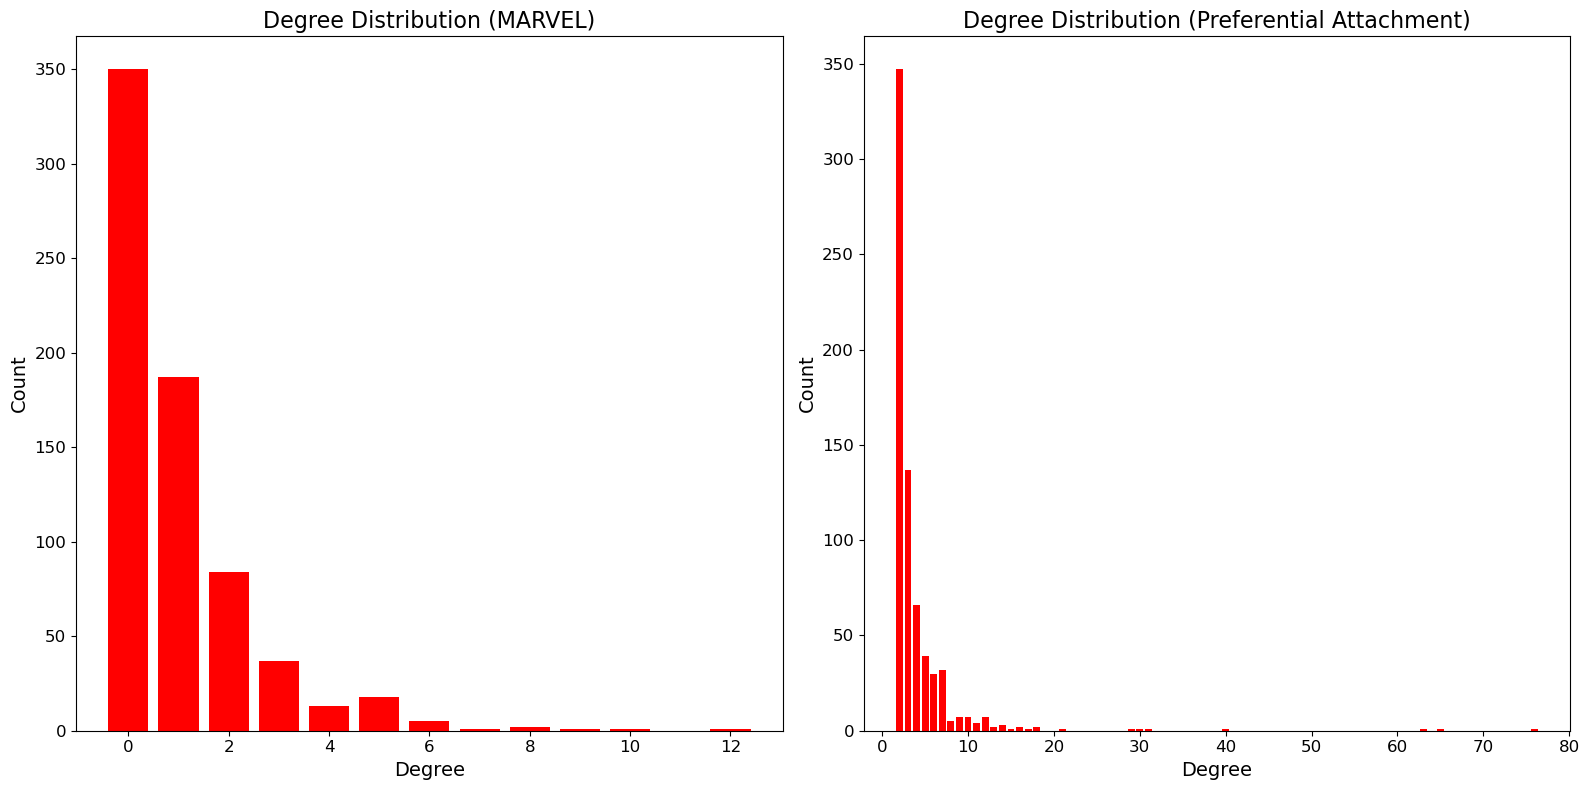

In [1708]:
import networkx as nx
import matplotlib.pyplot as plt

# Basic Graph Info
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

# Random Graph Model Parameters
n = num_nodes  # Total nodes
k = 2 * num_edges / num_nodes  # Average degree
m = max(2, int(k // 2))  # Ensure at least m=2 for triangle formation

# Set a random seed for consistent Preferential Attachment results
random_seed = 42

# Preferential Attachment Graph
'''Preferential Attachment is a mechanism describing how new nodes tend to
connect to existing high-degree nodes.'''
G_pa = nx.barabasi_albert_graph(n, m, seed=random_seed)

# Function to Calculate Average Degree
def average_degree(G):
    return sum(dict(G.degree()).values()) / G.number_of_nodes()

print("\n- Graph Comparisons -\n")

# Average Degree Comparison
print(f"Average Degree (MARVEL): {average_degree(G):.2f}")
print(f"Average Degree (PA): {average_degree(G_pa):.2f}")

# Clustering Coefficient Comparison
print(f"Average Clustering Coefficient (MARVEL): {nx.average_clustering(G):.4f}")
print(f"Average Clustering Coefficient (PA): {nx.average_clustering(G_pa):.4f}")

# Transitivity Comparison
print(f"Transitivity (MARVEL): {nx.transitivity(G):.4f}")
print(f"Transitivity (PA): {nx.transitivity(G_pa):.4f}")

# Debugging: Ensure Triangles Exist
print(f"Number of Triangles (MARVEL): {sum(nx.triangles(G).values()) // 3}")
print(f"Number of Triangles (PA): {sum(nx.triangles(G_pa).values()) // 3}")

# Degree Distributions
plt.figure(figsize=(16, 8))

for i, (graph, title) in enumerate([
    (G, "MARVEL"),
    (G_pa, "Preferential Attachment")
]):
    degrees = [d for _, d in graph.degree()]
    unique_degrees = list(set(degrees))
    count_of_degrees = [degrees.count(x) for x in unique_degrees]
    plt.subplot(1, 2, i + 1)
    plt.bar(unique_degrees, count_of_degrees, width=0.80, color='red')
    plt.title(f"Degree Distribution ({title})", fontsize=16)
    plt.xlabel("Degree", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

Results highlight key differences between Marvel Graph and Preferential Attachment Graph:
- MARVEL GRAPH = It is sparse since it has an average degree of 0.99 but it shows a moderate clustering of 0.0629, a transitivity of 0.2194 and 55 triangles indicating localized communities.
- PREFERENTIAL ATTACHMENT GRAPH = presents an higher average degree of 3.999 but a lower clustering of 0.0442, transitivity of 0.0158 and 76 triangles, indicating the presence of few higly connected hubs which means that the network is sparse whith minimal clustering and few triangles.

## Week 10

### a) Choose and Implement an Alternative Contagion Model

Depending on what seems more relevant in your graph, write the code for one of the following alternative models (not covered today):

- **Threshold Model Synchroneous**
- **Threshold Model Asynchroneous (random order)**
- **Fractional Threshold Model Synchroneous**
- **Fractional Threshold Model (random order)**
- **Independent Cascade Model**
- **Bass Contagion Model**
- **SIS Model**
- **A Variant that Seems Pertinent in Your Graph (Best choice)**

### b) Investigate Different Scenarios of Outbreak in Your Graph

Investigate different scenarios of outbreak in your graph, including:

- Different sizes of outbreaks
- Different origins of outbreaks
- Different parameters of the model

_______________________

We chose to implement the Fractional Threshold Model Synchroneous because since all the nodes evaluate their states simoultaneously, different thresholds impact the overall network behavior in a cohesive way, so it provides us a clearer view of how influence spreads across the entire network at each time step.
Additionally, using a Fractional Threshold makes the model more feasible and adaptable to nodes with varying degrees, like the ones of our network, allowing it to better represent the diversity in influence.

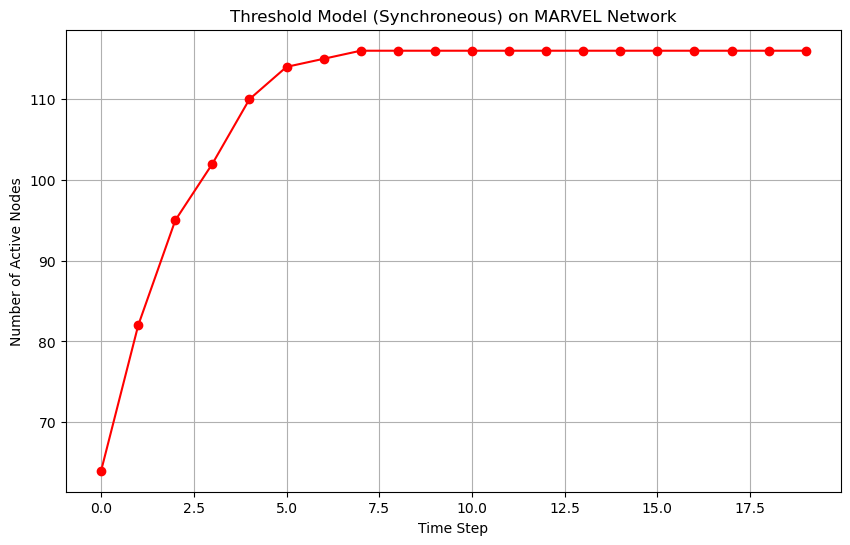

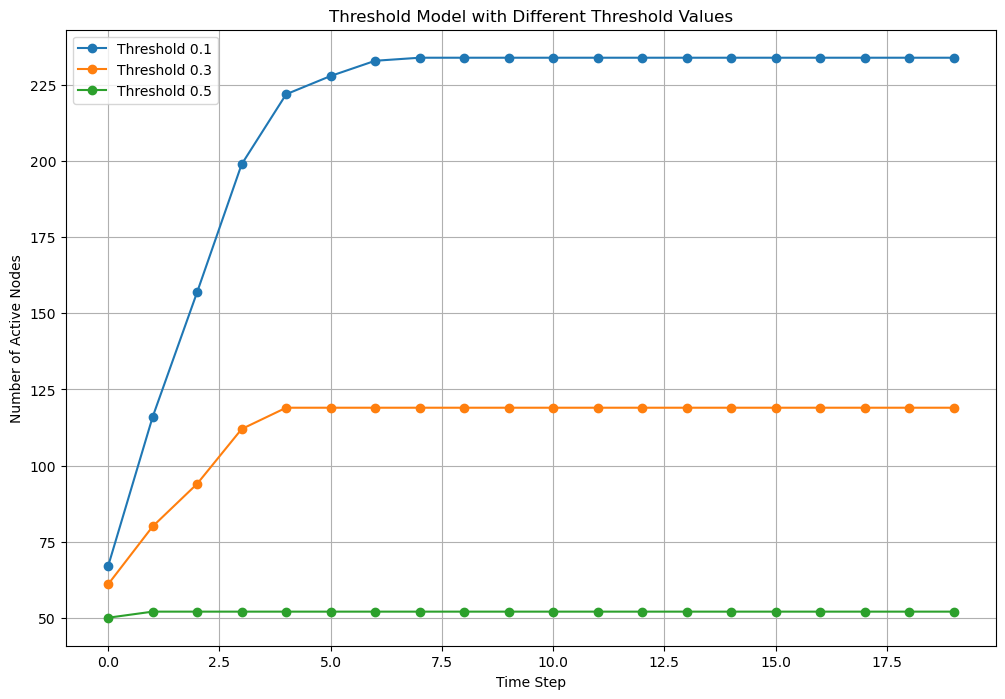

In [1711]:
import random
import matplotlib.pyplot as plt

# Parameters for the threshold model
threshold_value = 0.3  # Fraction of neighbors required to be active for a node to activate

# Initialize node states: 'S' for susceptible, 'A' for active
for node in G.nodes:
    G.nodes[node]['state'] = 'A' if random.random() < 0.05 else 'S'

# Function to simulate one step of the threshold model
def threshold_model_step(G, threshold_value):
    new_states = {}
    for node in G.nodes:
        if G.nodes[node]['state'] == 'S':
            degree = G.degree(node)
            if degree > 0:  # Avoid division by zero
                active_neighbors = sum(1 for neighbor in G.neighbors(node) if G.nodes[neighbor]['state'] == 'A')
                if active_neighbors / degree >= threshold_value:
                    new_states[node] = 'A'
    # Update states
    for node, new_state in new_states.items():
        G.nodes[node]['state'] = new_state

# Simulate the threshold model over multiple steps
num_steps = 20
active_counts = []

for step in range(num_steps):
    threshold_model_step(G, threshold_value)
    active_count = sum(1 for node in G.nodes if G.nodes[node]['state'] == 'A')
    active_counts.append(active_count)

# Plot the number of active nodes over time
plt.figure(figsize=(10, 6))
plt.plot(range(num_steps), active_counts, marker='o', linestyle='-', color='red')
plt.xlabel("Time Step")
plt.ylabel("Number of Active Nodes")
plt.title("Threshold Model (Synchroneous) on MARVEL Network")
plt.grid()
plt.show()

# Investigate Different Scenarios
# Scenario 1: Different threshold values
threshold_values = [0.1, 0.3, 0.5]
plt.figure(figsize=(12, 8))

for threshold in threshold_values:
    # Initialize node states
    for node in G.nodes:
        G.nodes[node]['state'] = 'A' if random.random() < 0.05 else 'S'
        
    
    # Simulate the threshold model
    active_counts = []
    for step in range(num_steps):
        threshold_model_step(G, threshold)
        active_count = sum(1 for node in G.nodes if G.nodes[node]['state'] == 'A')
        active_counts.append(active_count)
    
    # Plot the results
    plt.plot(range(num_steps), active_counts, marker='o', linestyle='-', label=f'Threshold {threshold}')

plt.xlabel("Time Step")
plt.ylabel("Number of Active Nodes")
plt.title("Threshold Model with Different Threshold Values")
plt.legend()
plt.grid()
plt.show()

This results demopnstrate how activation spreads out within the Marvel Network under different Thresholds. 
- THRESHOLD 0.3 = The spread of activation becomes constant around 67 nodes.
- THRESHOLD 0.1 = The spread of activation extends to over 220 nodes.
- THRESHOLD 0.5 = Spread of activation is limited to about 60 nodes.
These results highlight how the contagion process is shaped: lower thresholds allow activation to reach many nodes, while higher thresholds limit it to smaller connected groups.

# CONCLUSIONS:
Advanced network analytical techniques were used in this project to find out the structural and important patterns in the characters' network of the Marvel Universe. The study treated characters as nodes and co-occurrences as edges on Wikipedia pages; it provided a robust framework of understanding relationships and alliances which drive the Marvel storytelling.

We looked at the very primary network properties like node counts and edge counts, average degree, and density to disclose a sparse but connected structure. Global metrics like average clustering and transitivity were analyzed, focusing on the largest connected component, to understand the local cohesiveness and global connectedness of the network. Advanced measures such as centrality brought to light the major actors in terms of the pivotal role played by them in narrative arcs. 
Lastly, link prediction and random graph modeling provided insight about the growth and evolution of the Marvel Universe. Using indices, we predicted the missing links and other models such as preferential attachments showed probability distribution about network expansion.

The results reveal the richness and complexity of the Marvel Universe's narrative architecture, showing how partnerships and alliances play an active role in the narrative. Such research shows how data-driven techniques could reveal new lights to such imaginary worlds. It also considers the analytical power upon which we stand in interpreting complex networks. This opens the future for further explorations into other domains, demonstrating more on what can happen when managerial insights combine with computational analysis to unveil hidden trends and structures.